In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
geant4_name = "../Geant4_images_5x5.h5"  #reference distribution

#diffusion_name = "../GSGM_1cond.h5"
#diffusion_name = "../GSGM_256mlp.h5"
diffusion_name = "../GSGM_128mlp.h5"
diffusion_name = "../GSGM_largeProj.h5"

#diffusion_name = "../FPCD_images_5x5_updated.h5"

score_name = "../CaloScore_images_5x5.h5"

g4 = h5py.File(geant4_name, 'r')
fpcd = h5py.File(diffusion_name,'r+')
caloS = h5py.File(score_name,'r')

print(g4.keys())
print(fpcd.keys())
print(caloS.keys())

nevts = 100_000

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../GSGM_largeProj.h5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)

In [3]:
#Rename Dataset, and take only E, not Theta
energies = fpcd['cluster_features'][:,1:]
del fpcd['cluster_features']
fpcd['truth_features'] = energies

In [4]:
#Rename Dataset, and take only first element, E
#energies = g4['cluster'][:,0:1]
#del g4['cluster']
#g4['truth_features'] = energies

In [5]:
#Only Rename Dataset
#caloS['truth_features'] = caloS['cluster']
#del caloS['cluster']

In [4]:
print(fpcd.keys())
print(g4.keys())
print(caloS.keys())

<KeysViewHDF5 ['cell_features', 'truth_features']>
<KeysViewHDF5 ['calo_images', 'truth_features']>
<KeysViewHDF5 ['calo_images', 'truth_features']>


In [5]:
caloS.close()
g4.close()
fpcd.close()

In [8]:
# Number of Unique Hits

In [9]:
#print(im_data[0,5,:,6])

In [10]:
nevts = 10_000
g4_name = "../Geant4_images_5x5.h5"
g4 = h5py.File(g4_name, 'r')
g4_data = g4['calo_images'][:nevts]

cs_name = "../CaloScore_images_5x5.h5"
cs = h5py.File(cs_name, 'r')
cs_data = cs['calo_images'][:nevts]

pc_name = "../FPCD_images_5x5.h5"
pc_name = "../FPCD_images_5x5_700k_param.h5"
pc = h5py.File(pc_name, 'r')
pc_data = pc['calo_images'][:nevts]

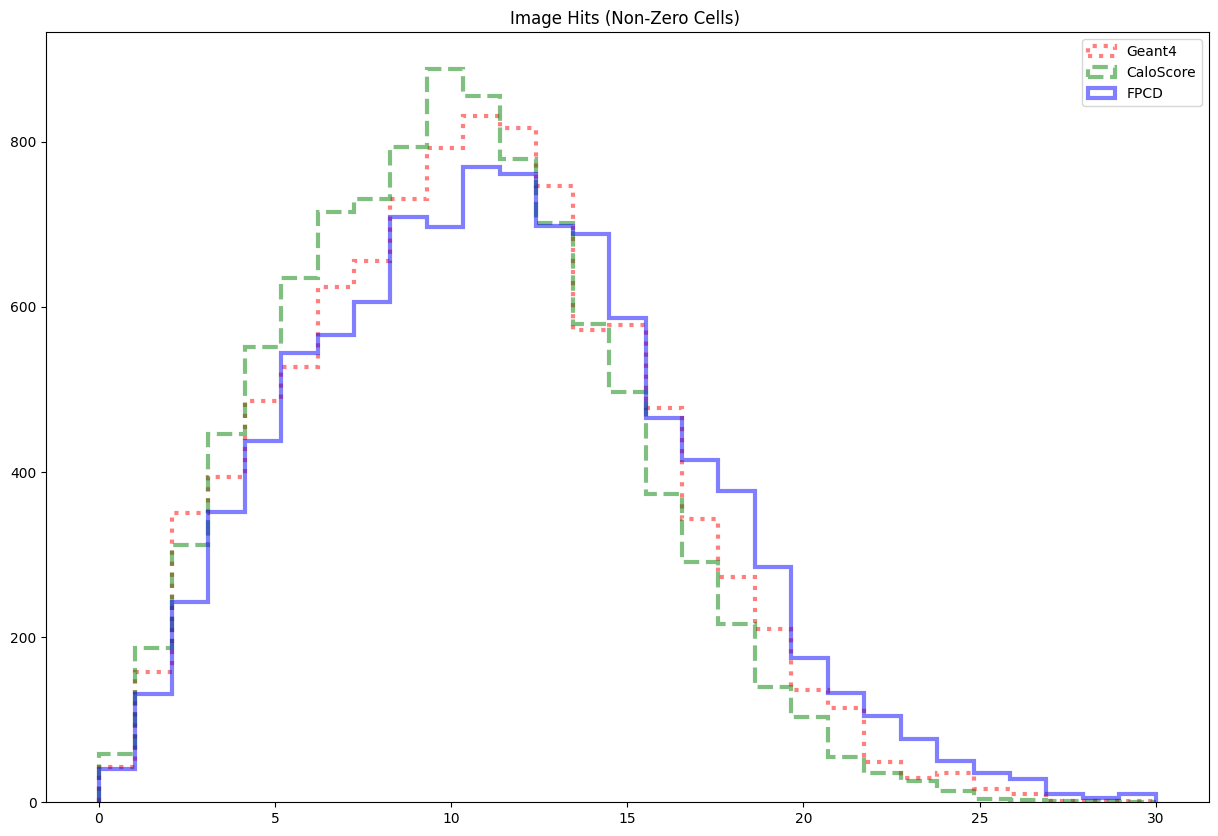

In [11]:
nevts = 10_000
g4_flat = np.reshape(g4_data,(nevts,-1))
g4_counts = np.count_nonzero(g4_flat,axis=-1)

cs_flat = np.reshape(cs_data,(nevts,-1))
cs_counts = np.count_nonzero(cs_flat,axis=-1)

pc_flat = np.reshape(pc_data,(nevts,-1))
pc_counts = np.count_nonzero(pc_flat,axis=-1)
    
fig = plt.figure(figsize=(15,10))
e_bins = np.linspace(0.0,30, 30)
plt.hist(np.ravel(g4_counts),bins=e_bins,alpha=0.5,label="Geant4",color="red",histtype='step',linestyle='dotted',linewidth=3)
plt.hist(np.ravel(cs_counts),bins=e_bins,alpha=0.5,label="CaloScore",color="green",histtype='step',linestyle='--',linewidth=3)
plt.hist(np.ravel(pc_counts),bins=e_bins,alpha=0.5,label="FPCD",color="blue",histtype='step',linewidth=3)

#plt.xscale('log')
plt.legend()
plt.title("Image Hits (Non-Zero Cells) ")
plt.savefig("E_Sums.pdf")

In [12]:
print(np.shape(g4_data))
print(np.shape(cs_data))
print(np.shape(pc_data))

(10000, 11, 11, 11)
(10000, 1331)
(10000, 11, 11, 11)


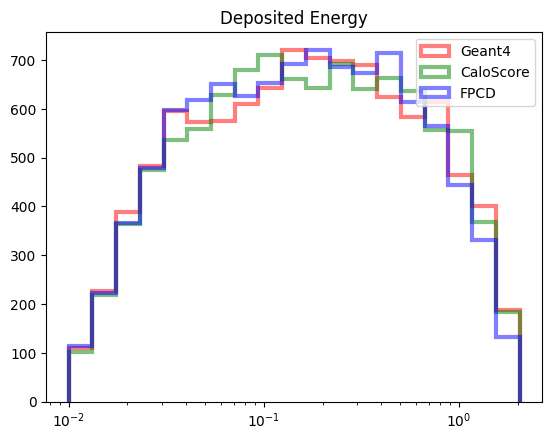

In [13]:
g4_sums = g4_data.sum(-1).sum(-1).sum(-1)
cs_sums = cs_data.sum(-1)
pc_sums = np.abs(pc_data).sum(-1).sum(-1).sum(-1)

e_bins = np.logspace(-2,0.31, 20)
plt.hist(np.ravel(g4_sums),bins=e_bins,alpha=0.5,label="Geant4",color="red",histtype='step',linewidth=3)
plt.hist(np.ravel(cs_sums),bins=e_bins,alpha=0.5,label="CaloScore",color="green",histtype='step',linewidth=3)
plt.hist(np.ravel(pc_sums),bins=e_bins,alpha=0.5,label="FPCD",color="blue",histtype='step',linewidth=3)
plt.xscale('log')
plt.legend()
plt.title("Deposited Energy")
plt.savefig("E_Sums.pdf")

In [14]:
print(pc_sums)

[0.16179815 0.1843021  1.2458595  ... 0.0562921  0.04898438 0.13622926]


In [15]:
g4_data = g4['calo_images'][:nevts]
cs_data = cs['calo_images'][:nevts]
pc_data = pc['calo_images'][:nevts]

In [16]:
print(np.shape(cs_data))

(10000, 1331)


In [17]:
g4_image = g4_data.sum(0).sum(-1)
cs_image = cs_data.sum(0).sum(-1)
pc_image = pc_data.sum(0).sum(-1)

In [18]:
print(np.shape(cs_image))

()


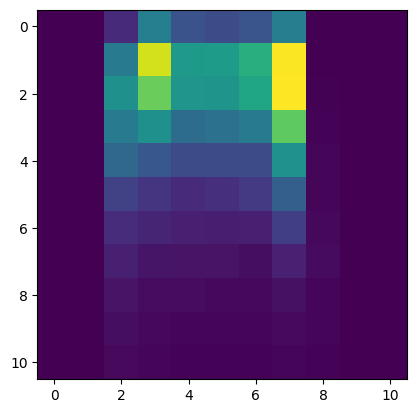

In [21]:
#plt.imshow(g4_image)
plt.imshow(pc_image)